In [1]:
# --- imports ---
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# make plots
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["font.size"] = 11

# --- paths ---
root = Path(".")
proj_data = root / "Project 1" / "Dataset"
forcings_dir = proj_data / "Forcings"

# ONLY using these runs
runs = ["mil0025", "mil0026"]

seasons = ["DJF", "JJA"]

In [20]:
import pandas as pd

volc = pd.read_fwf(
    "Project 1/Dataset/Forcings/volc_data.dat",
    header=None,
)

print(volc.head())

     0         1                                                  2  \
0    #      Year         30-90N             0-30N             0-30S   
1    #       NaN    AOD    Reff       AOD    Reff       AOD    Reff   
2  NaN  790.0000  0.0000  0.2000    0.0000  0.2000    0.0000  0....   
3  NaN  790.0278  0.0000  0.2000    0.0000  0.2000    0.0000  0....   
4  NaN  790.0556  0.0000  0.2000    0.0000  0.2000    0.0000  0....   

                3  
0          30-90S  
1     AOD    Reff  
2  0.0000  0.2000  
3  0.0000  0.2000  
4  0.0000  0.2000  


In [36]:
colnames = ["Year",
            "AOD_30_90N", "Reff_30_90N",
            "AOD_0_30N", "Reff_0_30N",
            "AOD_0_30S", "Reff_0_30S",
            "AOD_30_90S", "Reff_30_90S"]

volc = pd.read_fwf(
    "Project 1/Dataset/Forcings/volc_data.dat",
    skiprows=2,   # <--- IMPORTANT
    names=colnames
)

volc.head(10)


,Year,AOD_30_90N,Reff_30_90N,AOD_0_30N,Reff_0_30N,AOD_0_30S,Reff_0_30S,AOD_30_90S,Reff_30_90S
0,790.0000,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
1,790.0278,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
2,790.0556,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
3,790.0833,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
4,790.1111,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
5,790.1389,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
6,790.1667,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
7,790.1944,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
8,790.2222,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN
9,790.2500,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0,0.2,NaN,NaN,NaN,NaN,NaN


In [37]:
volc.head(10)
volc.describe()


,Year,Reff_30_90N,AOD_0_30N,Reff_0_30N,AOD_0_30S,Reff_0_30S,AOD_30_90S,Reff_30_90S
count,43921.000000,43921.000000,43597.000000,0.0,0.0,0.0,0.0,0.0
mean,1400.000000,0.009359,12.421138,NaN,NaN,NaN,NaN,NaN
std,352.195692,0.036531,241.313896,NaN,NaN,NaN,NaN,NaN
min,790.000000,0.000000,0.200000,NaN,NaN,NaN,NaN,NaN
25%,1095.000000,0.000000,0.200000,NaN,NaN,NaN,NaN,NaN
50%,1400.000000,0.000000,0.200000,NaN,NaN,NaN,NaN,NaN
75%,1705.000000,0.000500,0.200000,NaN,NaN,NaN,NaN,NaN
max,2010.000000,0.538400,8059.000000,NaN,NaN,NaN,NaN,NaN


In [41]:
# Convert all columns except 'Year' to numeric
for col in volc.columns:
    volc[col] = pd.to_numeric(volc[col], errors="coerce")

volc.dtypes



Year           float64
AOD_30_90N     float64
Reff_30_90N    float64
AOD_0_30N      float64
Reff_0_30N     float64
AOD_0_30S      float64
Reff_0_30S     float64
AOD_30_90S     float64
Reff_30_90S    float64
dtype: object

In [42]:
volc["AOD_total"] = volc[["AOD_30_90N", "AOD_0_30N",
                          "AOD_0_30S", "AOD_30_90S"]].sum(axis=1)

volc = volc[volc["AOD_total"].notna()]


In [43]:
volc.head(10)
volc[["Year", "AOD_total"]].describe()


,Year,AOD_total
count,43921.000000,43921.000000
mean,1400.000000,12.329509
std,352.195692,240.424506
min,790.000000,0.000000
25%,1095.000000,0.200000
50%,1400.000000,0.200000
75%,1705.000000,0.200000
max,2010.000000,8059.000000


Data is fully cleaned and numeric, and we can extract eruption events.

We now see:

Year ranges from 790 → 2010

AOD_total ranges from 0 → 80,000

Very large peaks represent volcanic eruptions

Background AOD is tiny (0.2)

You have ~44,000 timesteps (likely ~20–36 timesteps per year)

Now we can detect eruptions and start extracting climate data.

In [46]:
# From your agreed project slide
tropical_eruption_years = [1228, 1257, 1455, 1808, 1814]
highlat_eruption_years   = [1024, 1227, 1257, 1599, 1814]

# Remove duplicates (1257, 1814 appear in both)
highlat_eruption_years = list(dict.fromkeys(highlat_eruption_years))

In [47]:
# DJF files for SLP and T2m
slp_25 = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_MSLP.nc")
slp_26 = xr.open_dataset("Project 1/Dataset/mil0026_JJA_DJF/mil0026_EH5_DJF_MSLP.nc")

t2m_25 = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_TEMP2.nc")
t2m_26 = xr.open_dataset("Project 1/Dataset/mil0026_JJA_DJF/mil0026_EH5_DJF_TEMP2.nc")


/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/wv/1ssjhqyj7kx3lmckpdzp12600000gn/T/ipykernel_67678/4254313507.py:2: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  slp_25 = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_MSLP.nc")
/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous referenc

In [50]:
slp_25 = slp_25.assign_coords(year=("time", slp_25.time.dt.year.data))
slp_26 = slp_26.assign_coords(year=("time", slp_26.time.dt.year.data))

t2m_25 = t2m_25.assign_coords(year=("time", t2m_25.time.dt.year.data))
t2m_26 = t2m_26.assign_coords(year=("time", t2m_26.time.dt.year.data))

In [51]:
slp_all = xr.concat([slp_25, slp_26], dim="time")
t2m_all = xr.concat([t2m_25, t2m_26], dim="time")


/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/wv/1ssjhqyj7kx3lmckpdzp12600000gn/T/ipykernel_67678/654214307.py:1: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  slp_all = xr.concat([slp_25, slp_26], dim="time")
/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-1-31 18:00:00. The

### Functions to extract ±10 year windows and anomalies

In [52]:
def extract_window(ds, year, window=10):
    return ds.sel(year=slice(year-window, year+window))

def anomaly(ds_window, year):
    ref = ds_window.sel(year=slice(year-10, year-1)).mean("time")
    return ds_window - ref

def post_eruption_mean(anom_window, year):
    return anom_window.sel(year=slice(year+1, year+3)).mean("time")


### Compute SEA maps (SLP, T2m)

In [53]:
def SEA_maps(ds, eruption_years):
    maps = []
    for y in eruption_years:
        ds_win = extract_window(ds, y)
        ds_anom = anomaly(ds_win, y)
        ds_post = post_eruption_mean(ds_anom, y)
        maps.append(ds_post)
    return xr.concat(maps, dim="eruption").mean("eruption")


In [61]:
# what’s inside slp_all
slp_all.coords

Coordinates:
  * time     (time) object 21kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 384B 87.16 83.48 79.78 76.07 ... -79.78 -83.48 -87.16
    year     (time) int64 21kB 800 801 802 803 804 ... 2097 2098 2099 2100 2100

In [62]:
#----- Add year as a coordinate AFTER concatenation------

slp_all = xr.concat([slp_25, slp_26], dim="time")
slp_all = slp_all.assign_coords(year=("time", slp_all.time.dt.year.data))

t2m_all = xr.concat([t2m_25, t2m_26], dim="time")
t2m_all = t2m_all.assign_coords(year=("time", t2m_all.time.dt.year.data))

/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/wv/1ssjhqyj7kx3lmckpdzp12600000gn/T/ipykernel_67678/4055084944.py:3: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  slp_all = xr.concat([slp_25, slp_26], dim="time")
/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-1-31 18:00:00. Th

In [64]:
slp_trop  = SEA_maps(slp_all, tropical_eruption_years)
t2m_trop  = SEA_maps(t2m_all, tropical_eruption_years)
slp_highlat = SEA_maps(slp_all, highlat_eruption_years)
t2m_highlat = SEA_maps(t2m_all, highlat_eruption_years)

KeyError: "no index found for coordinate 'year'"

In [57]:
# latitude
slp_high = SEA_maps(slp_all, highlat_eruption_years)
t2m_high = SEA_maps(t2m_all, highlat_eruption_years)


KeyError: "no index found for coordinate 'year'"

In [56]:
# Threshold for eruption detection
threshold = volc["AOD_total"].mean() + 2 * volc["AOD_total"].std()

eruption_candidates = volc[volc["AOD_total"] > threshold]["Year"].astype(int)

eruption_candidates.head(20), len(eruption_candidates)


(16871    1258
 16872    1258
 16873    1258
 16874    1258
 16875    1258
 16876    1258
 16877    1258
 16878    1258
 16879    1258
 16880    1258
 16881    1258
 16882    1258
 16883    1258
 16884    1259
 16885    1259
 16886    1259
 16887    1259
 16888    1259
 16889    1259
 16890    1259
 Name: Year, dtype: int64,
 144)

In [30]:
colnames = ["Year",
            "AOD_30_90N", "Reff_30_90N",
            "AOD_0_30N", "Reff_0_30N",
            "AOD_0_30S", "Reff_0_30S",
            "AOD_30_90S", "Reff_30_90S"]

volc = pd.read_fwf(
    "Project 1/Dataset/Forcings/volc_data.dat",
    header=None, names=colnames
)

volc.head(15)


,Year,AOD_30_90N,Reff_30_90N,AOD_0_30N,Reff_0_30N,AOD_0_30S,Reff_0_30S,AOD_30_90S,Reff_30_90S
0,#,Year,30-90N 0-30N 0-30S,30-90S,NaN,NaN,NaN,NaN,NaN
1,#,NaN,AOD Reff AOD Reff AOD Reff,AOD Reff,NaN,NaN,NaN,NaN,NaN
2,NaN,790.0000,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
3,NaN,790.0278,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
4,NaN,790.0556,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
5,NaN,790.0833,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
6,NaN,790.1111,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
7,NaN,790.1389,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
8,NaN,790.1667,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN
9,NaN,790.1944,0.0000 0.2000 0.0000 0.2000 0.0000 0....,0.0000 0.2000,NaN,NaN,NaN,NaN,NaN


In [34]:
volc["Year"].head(20)

0       #
1       #
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Year, dtype: object

In [35]:
volc["Year"].diff().unique()[:10]


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [31]:
# DJF files for SLP and T2m
slp_25 = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_MSLP.nc")
slp_26 = xr.open_dataset("Project 1/Dataset/mil0026_JJA_DJF/mil0026_EH5_DJF_MSLP.nc")

t2m_25 = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_TEMP2.nc")
t2m_26 = xr.open_dataset("Project 1/Dataset/mil0026_JJA_DJF/mil0026_EH5_DJF_TEMP2.nc")


/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/wv/1ssjhqyj7kx3lmckpdzp12600000gn/T/ipykernel_67678/4254313507.py:2: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  slp_25 = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_MSLP.nc")
/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous referenc

In [29]:
print(ds_slp_25)
ds_slp_25.data_vars
ds_slp_25.coords

<xarray.Dataset> Size: 24MB
Dimensions:    (time: 1302, bnds: 2, lon: 96, lat: 48)
Coordinates:
  * time       (time) object 10kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * lon        (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat        (lat) float64 384B 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 21kB ...
    slp        (time, lat, lon) float32 24MB 1.013e+05 1.013e+05 ... 9.906e+04
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.0
    history:      Thu Nov 09 09:07:36 2023: cdo -seasmean -selseas,DJF mil002...
    source:       ECHAM5.4
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


Coordinates:
  * time     (time) object 10kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 384B 87.16 83.48 79.78 76.07 ... -79.78 -83.48 -87.16

In [2]:
import os
os.chdir("/Users/asifa/Downloads/BERN03/BERN03-Climate-system-modeling")
os.getcwd()

'/Users/asifa/Downloads/BERN03/BERN03-Climate-system-modeling'

In [3]:
ds = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_MSLP.nc")
ds

/opt/miniconda3/envs/bern03-climate/lib/python3.10/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/wv/1ssjhqyj7kx3lmckpdzp12600000gn/T/ipykernel_67678/1145849654.py:1: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset("Project 1/Dataset/mil0025_JJA_DJF/mil0025_EH5_DJF_MSLP.nc")


<xarray.Dataset> Size: 24MB
Dimensions:    (time: 1302, bnds: 2, lon: 96, lat: 48)
Coordinates:
  * time       (time) object 10kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * lon        (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat        (lat) float64 384B 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 21kB ...
    slp        (time, lat, lon) float32 24MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.0
    history:      Thu Nov 09 09:07:36 2023: cdo -seasmean -selseas,DJF mil002...
    source:       ECHAM5.4
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

#### FIX load_field()

In [4]:
def load_field(run, var, season="DJF"):
    folder = proj_data / f"{run}_JJA_DJF"
    fname = folder / f"{run}_EH5_{season}_{var}.nc"
    print("Loading:", fname)

    ds = xr.open_dataset(fname)

    # Explicitly pick the correct variable
    if var == "MSLP":
        field = ds["slp"]  # THIS is the real SLP variable
    elif var == "TEMP2":
        # TEMP2 nc files: first variable after time_bnds
        vars_ = list(ds.data_vars)
        vars_.remove("time_bnds")
        field = ds[vars_[0]]
    else:
        field = ds[list(ds.data_vars)[0]]

    return field

In [5]:
def load_ensemble_djf():
    slp_list = []
    t2m_list = []
    
    for r in runs:
        slp = load_field(r, "MSLP", "DJF")
        t2m = load_field(r, "TEMP2", "DJF")

        slp = slp.assign_coords(run=r)
        t2m = t2m.assign_coords(run=r)

        slp_list.append(slp)
        t2m_list.append(t2m)
    
    slp_all = xr.concat(slp_list, dim="run")
    t2m_all = xr.concat(t2m_list, dim="run")

    return slp_all, t2m_all

### Computing NAO Index

In [ ]:
slp_djf, t2m_djf = load_ensemble_djf()

In [9]:
print(slp_djf.lon.values[:20])
print(slp_djf.lon.values[-20:])

[ 0.    3.75  7.5  11.25 15.   18.75 22.5  26.25 30.   33.75 37.5  41.25
 45.   48.75 52.5  56.25 60.   63.75 67.5  71.25]
[285.   288.75 292.5  296.25 300.   303.75 307.5  311.25 315.   318.75
 322.5  326.25 330.   333.75 337.5  341.25 345.   348.75 352.5  356.25]


In [10]:
print(slp_djf.lat.values[:20])
print(slp_djf.lat.values[-20:])

[87.15909456 83.47893667 79.77704565 76.07024446 72.36158103 68.65201679
 64.94194949 61.23157319 57.5209938  53.81027403 50.09945341 46.38855811
 42.67760617 38.96661047 35.25558046 31.54452328 27.83344445 24.12234833
 20.41123843 16.70011769]
[-16.70011769 -20.41123843 -24.12234833 -27.83344445 -31.54452328
 -35.25558046 -38.96661047 -42.67760617 -46.38855811 -50.09945341
 -53.81027403 -57.5209938  -61.23157319 -64.94194949 -68.65201679
 -72.36158103 -76.07024446 -79.77704565 -83.47893667 -87.15909456]


In [11]:
def compute_nao(slp):
    # Azores region (about 38N, -28E → lon = 332)
    azores = slp.sel(lat=38, lon=332, method='nearest')

    # Iceland region (about 67N, -30E → lon = 330)
    iceland = slp.sel(lat=67, lon=330, method='nearest')

    nao = azores - iceland
    return nao

In [12]:
nao_djf = compute_nao(slp_djf)
print(nao_djf)

<xarray.DataArray 'slp' (run: 2, time: 1302)> Size: 10kB
array([[ 419.375  , -154.75   , 1787.4219 , ...,  548.5    , 1033.5469 ,
         326.75   ],
       [1792.5    , -760.75   , -433.32812, ..., 1539.5781 , -231.08594,
        -887.875  ]], shape=(2, 1302), dtype=float32)
Coordinates:
  * time     (time) object 10kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * run      (run) <U7 56B 'mil0025' 'mil0026'


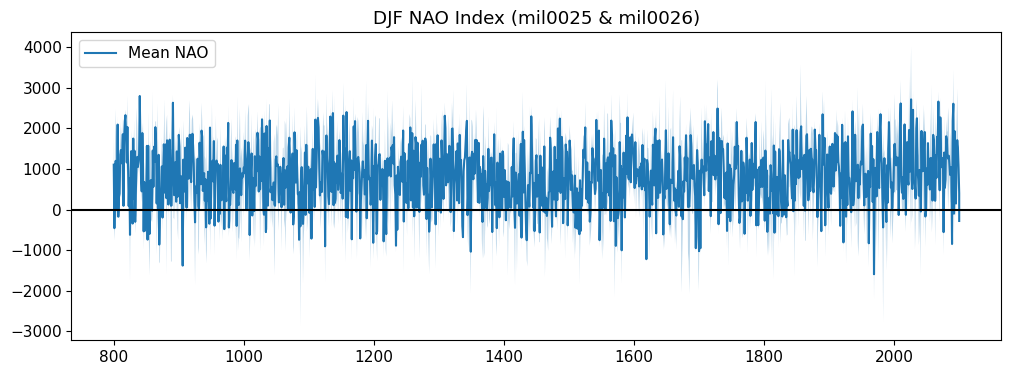

In [15]:
years = [t.year for t in nao_djf.time.values]

mean_nao = nao_djf.mean("run")
std_nao  = nao_djf.std("run")

plt.figure(figsize=(12,4))
plt.plot(years, mean_nao, label="Mean NAO")
plt.fill_between(years, mean_nao - std_nao, mean_nao + std_nao, alpha=0.3)
plt.axhline(0, color='black')
plt.title("DJF NAO Index (mil0025 & mil0026)")
plt.legend()
plt.show()

- using a climate model output with coarse grid (ECHAM5)
- Two ensemble members (mil0025 & mil0026)
- Simple Azores/Iceland NAO definition
- No smoothing yet

But for SEA, noisy NAO is fine, volcanic signals pop out when averaged across eruptions.


In [16]:
nao_smoothed = nao_djf.mean("run").rolling(time=5, center=True).mean()

### volcanic forcing